In [1]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from bot.utils.color_extractor import ColorFeaturesExtractor
from bot.utils.BOVW_extractor import BOVWFeaturesExtractor
from bot.utils.hog_extractor import HogFeaturesExtractor
from bot.utils.retriever import Retriever
from bot.utils.utils import get_names_from_indexes
import tensorflow as tf
from skimage.io import imread
import pickle

# Create indexes

In [2]:
def create_index(features_path, index_dir_path, retrieval_mode, metric):
    # read features
    df_features = pd.read_csv(features_path, sep=',', header=None)
    # instantiate retriever
    retriever = Retriever(index_dir_path)
    # create index
    retriever.create_index(df_features, retrieval_mode=retrieval_mode, metric = metric)
#     return df_features

In [3]:
# neural network features
create_index('../data/nn_features.csv', '../indexes/', 'neural_network', 'euclidean')

In [4]:
# color features
create_index('../data/color_features.csv', '../indexes/', 'color', 'euclidean')

In [5]:
# BOVW features
create_index('../data/BOVW_features.csv', '../indexes/', 'bovw', 'euclidean')

In [3]:
# HOG features
create_index('../data/HOG_features.csv', '../indexes/', 'hog', 'euclidean')

In [3]:
# color + HOG features
create_index('../data/merged_color_hog_features.csv', '../indexes/', 'color_hog', 'euclidean')

In [4]:
# color + HOG features with pca
create_index('../data/merged_color_hog_pca.csv', '../indexes/', 'color_hog_pca', 'euclidean')

In [3]:
# color + HOG features with pca and standardization
create_index('../data/merged_color_hog_pca_std.csv', '../indexes/', 'color_hog_pca_std', 'euclidean')

# Test retrieval

In [4]:
# utils
def show_images(idx, names_df):
    names = names_df.loc[idx,'name'].values
    for i in range(0,len(names)):
        tmp = cv2.imread('../data/train/' + names[i])
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        plt.imshow(tmp)
        plt.show()

def loadimg(img_path):

    im = tf.keras.preprocessing.image.load_img(
        img_path,
        target_size=(300, 300, 3)
    )
    imarr = tf.keras.preprocessing.image.img_to_array(im)
    imarr = tf.keras.applications.efficientnet.preprocess_input(imarr)
    return np.array([imarr])




In [5]:
# instantiate retriever
retriever = Retriever('../indexes/', load_all=True)

loading neural_network ...
loading color ...
loading bovw ...
loading hog ...
loading color_hog ...
loading color_hog_pca ...
loading color_hog_pca_std ...


## Neural network

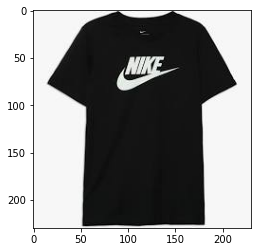

In [8]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
img_path = '../test_imgs/tshirt.jpg'
img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [4]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [5]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]

In [6]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network', n_neighbours=5, include_distances=True)

retrieve from preloaded indexes


In [7]:
distances

[0.5789197683334351,
 8.45349407196045,
 8.868157386779785,
 8.93391227722168,
 9.006895065307617]

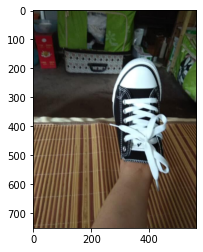

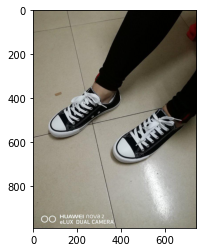

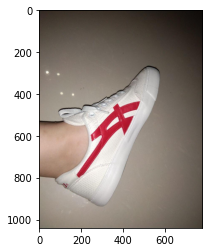

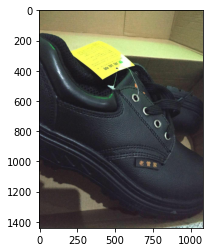

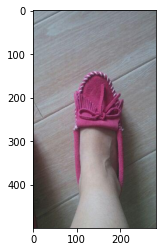

In [8]:
# show retrieval results
show_images(indexes, df_names)


## Color

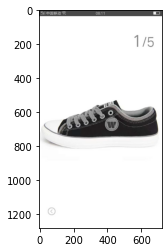

In [98]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
img_path = '../test_imgs/rpo.jpg'
img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [99]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), center_only=True)

In [100]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color', n_neighbours=5, include_distances=True)

retrieve from preloaded indexes


In [101]:
distances

[0.03606906160712242,
 0.0627850741147995,
 0.08229895681142807,
 0.08886274695396423,
 0.0894651785492897]

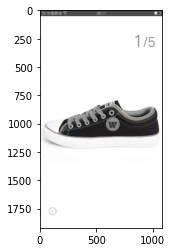

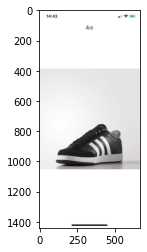

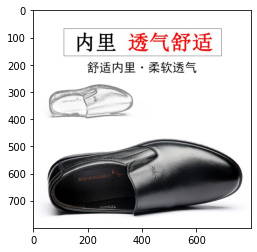

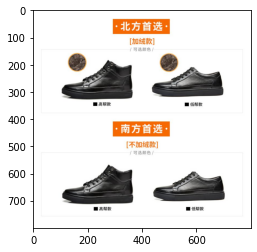

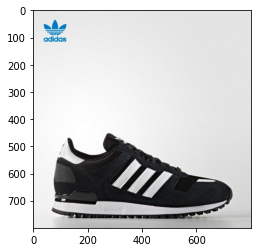

In [102]:
# show retrieval results
show_images(indexes, df_names)

## BOVW

In [ ]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
img_path = '../test_imgs/tshirt.jpg'
img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [62]:
# BOVW extractor
features_extractor = BOVWFeaturesExtractor('../data/')
img_features_bovw = features_extractor.extract(cv2.imread(img_path))

In [63]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_bovw, retrieval_mode='bovw', n_neighbours=5, include_distances=True)

In [64]:
distances

[0.0,
 0.12547647953033447,
 0.12832824885845184,
 0.12836667895317078,
 0.12888458371162415]

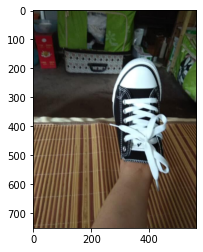

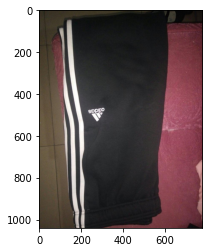

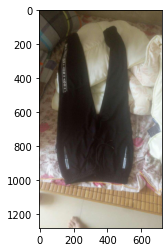

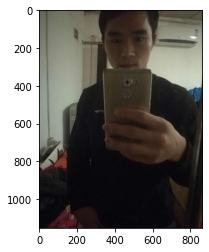

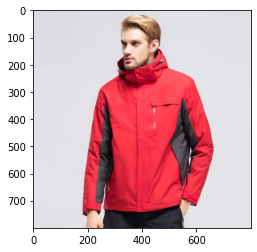

In [65]:
# show retrieval results
show_images(indexes, df_names)

## HOG

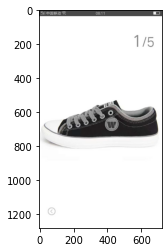

In [103]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
img_path = '../test_imgs/rpo.jpg'
img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [104]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))

In [105]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog, retrieval_mode='hog', n_neighbours=5, include_distances=True)

retrieve from preloaded indexes


In [106]:
distances

[2.2365872859954834,
 5.480720043182373,
 5.742683410644531,
 6.304882049560547,
 6.657373905181885]

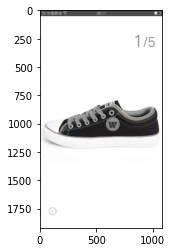

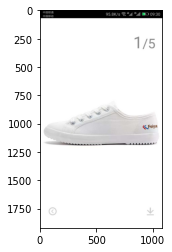

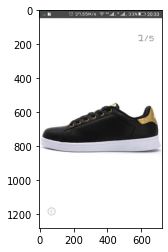

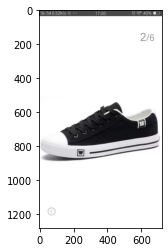

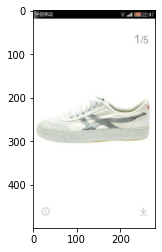

In [107]:
# show retrieval results
show_images(indexes, df_names)

## Color + HOG

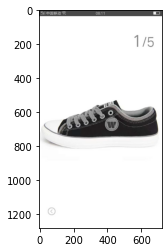

In [56]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
img_path = '../test_imgs/rpo.jpg'
img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [57]:
# extractors
hog_features_extractor = HogFeaturesExtractor()
color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# extract features
img_features_hog = hog_features_extractor.extract(imread(img_path))
img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# merge features
img_features_merged = np.concatenate((img_features_hog, img_features_color))

In [58]:
len(img_features_merged)

5652

In [59]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_merged, retrieval_mode='color_hog', n_neighbours=5, include_distances=True)

retrieve from preloaded indexes


In [60]:
distances

[2.236877202987671,
 5.481998443603516,
 5.747137546539307,
 6.307333946228027,
 6.6590256690979]

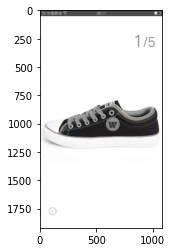

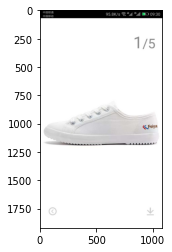

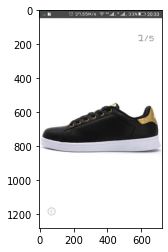

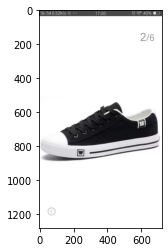

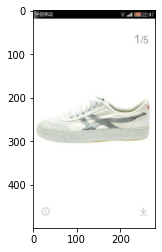

In [61]:
# show retrieval results
show_images(indexes, df_names)

## Color + HOG pca

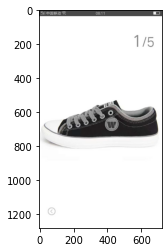

In [92]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
img_path = '../test_imgs/rpo.jpg'
img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [93]:
# extractors
hog_features_extractor = HogFeaturesExtractor()
color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# extract features
img_features_hog = hog_features_extractor.extract(imread(img_path))
img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# merge features
img_features_merged = np.concatenate((img_features_hog, img_features_color))
# read pca model
with open('../data/pca.pckl', 'rb') as handle:
                    pca = pickle.load(handle)
# apply pca
img_features_merged_pca = pca.transform([img_features_merged])[0]

In [94]:
img_features_merged_pca

array([ 2.94532422,  3.40222097,  1.99752197, ...,  0.10337862,
       -0.06392156,  0.13684278])

In [95]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='color_hog_pca', n_neighbours=5, include_distances=True)

retrieve from preloaded indexes


In [96]:
distances

[1.6048280000686646,
 4.93644380569458,
 5.094282150268555,
 5.615511894226074,
 5.870843410491943]

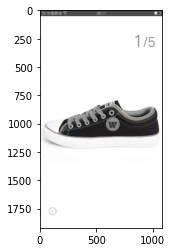

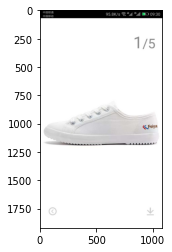

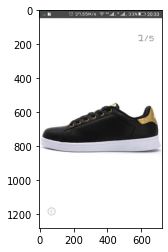

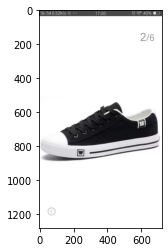

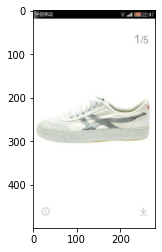

In [97]:
# show retrieval results
show_images(indexes, df_names)

## Color + HOG pca and standardization

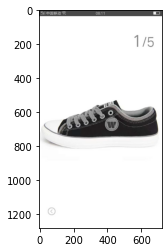

In [6]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
img_path = '../test_imgs/rpo.jpg'
img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [16]:
# extractors
hog_features_extractor = HogFeaturesExtractor()
color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# extract features
img_features_hog = hog_features_extractor.extract(imread(img_path))
img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# merge features
img_features_merged = np.concatenate((img_features_hog, img_features_color))
# read and apply scaler
with open('../data/scaler_std.pckl', 'rb') as handle:
                    scaler = pickle.load(handle)
img_features_merged = scaler.transform([img_features_merged])
# read and apply pca model
with open('../data/pca_std.pckl', 'rb') as handle:
                    pca = pickle.load(handle)
# apply pca
img_features_merged_pca = pca.transform(img_features_merged)[0]

In [19]:
img_features_merged_pca.shape

(1861,)

In [20]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='color_hog_pca_std', n_neighbours=5, include_distances=True)

retrieve from preloaded indexes


In [21]:
distances

[14.47956371307373,
 45.91600036621094,
 46.92875289916992,
 52.58710479736328,
 54.24134826660156]

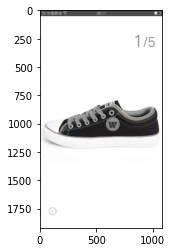

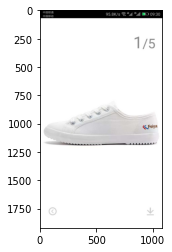

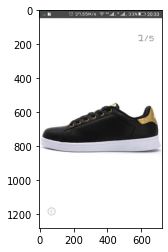

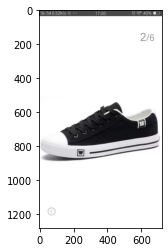

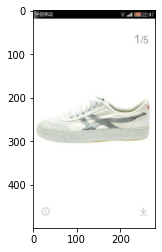

In [22]:
# show retrieval results
show_images(indexes, df_names)

# Test delete

In [ ]:
# test delete index
retriever.delete_index('color')